# <font color='#eb3483'> Principal Components Analysis - Exercise </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

For this exercise, we are going to develop an classifier to identify handwritten digits. The dataset contains 1797 images of handwritten digits (the numbers 0 to 9). Each digit is represented by an 8$\times$8 set of pixels that each contain a value between 0 and 16 indicating the darkness of the pixel. In this dataset, each image has been flattened into 64 (8 $\times$ 8) features. Intuitively, we expect that the values in pixels that are close together in the image are likely to be correlated. We will therefore begin our analyses by performing **dimension reduction** using principal components. Once we have determined the best number of components, we will proceed to use these as features in a logistic regression classifier.

Let's begin by importing and exploring the data:

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

### <font color='#eb3483'> Part 1: Familiarise yourself with the data and its structure </font>

In [3]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
df = pd.DataFrame(digits["data"], columns=digits["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [30]:

cormat = np.corrcoef(df.T)

pd.DataFrame(cormat, columns=df.columns, index=df.columns)
df.interpolate(inplace=True)
df

/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


### <font color='#eb3483'> Part 2: Perform a PCA and determine the best number of PCs to keep </font>

Step 1: Standardise the data column-wise

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=digits['feature_names'])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


In [32]:
df.mean()

pixel_0_0    0.000000e+00
pixel_0_1   -1.186215e-17
pixel_0_2    0.000000e+00
pixel_0_3    2.372430e-17
pixel_0_4    6.919587e-18
                 ...     
pixel_7_3   -7.908099e-18
pixel_7_4    3.954050e-18
pixel_7_5    2.965537e-17
pixel_7_6   -1.186215e-16
pixel_7_7    7.908099e-18
Length: 64, dtype: float64

In [34]:
df.std()

pixel_0_0    0.000000
pixel_0_1    1.000278
pixel_0_2    1.000278
pixel_0_3    1.000278
pixel_0_4    1.000278
               ...   
pixel_7_3    1.000278
pixel_7_4    1.000278
pixel_7_5    1.000278
pixel_7_6    1.000278
pixel_7_7    1.000278
Length: 64, dtype: float64

Step 2: Run a PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-0.634543,0.203625,-0.147253,0.125169,-0.099144,0.090559,-0.460240,0.003750,-0.334388,0.637207,...,0.025009,-0.348403,0.118509,0.086545,0.212065,-0.137322,0.330686,-0.166694,-0.144287,-0.009383
1,0.078153,-0.632564,-0.177820,0.545188,-0.062342,-0.337039,0.078897,-0.087598,0.082698,0.350592,...,0.025313,-0.303243,-0.445302,-0.284059,-0.145948,0.161029,0.245351,0.171267,0.197499,-0.152204
2,-0.463203,0.281920,0.218155,-0.605759,0.368301,0.288199,0.616233,-0.204639,-0.366966,0.061284,...,0.321121,-0.059401,0.060492,-0.371880,0.183173,-0.101843,0.141110,0.390786,0.378897,-0.149299
3,-0.629454,0.211181,-0.594492,0.036818,0.085265,-0.187538,0.492529,0.171392,-0.540460,-0.114404,...,-0.143181,0.113178,0.085276,-0.030737,0.260605,0.460545,0.410222,0.156363,0.293851,-0.042494
4,0.531121,0.484235,0.312967,0.131679,0.072308,0.210642,0.026126,0.325003,0.175746,0.096923,...,0.096149,0.372229,-0.035929,0.186090,-0.155799,0.025493,0.428795,0.397581,0.027666,-0.241429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.004818,-0.538064,0.567277,0.392062,0.053975,0.124999,0.012363,-0.173519,0.020442,-0.500034,...,0.084523,-0.044812,0.190426,0.056903,-0.117722,0.188279,-0.047775,-0.109688,-0.092135,0.035167
1793,0.144168,-0.429232,-0.371500,-0.011840,-0.028143,0.447259,0.380015,-0.679190,0.038576,0.313494,...,-0.237840,0.123070,0.150492,-0.033237,-0.149083,-0.306191,0.129678,-0.018950,0.047938,-0.306285
1794,0.474141,0.185506,-0.071623,-0.000360,-0.095860,-0.318601,-0.110930,0.235171,-0.080555,-0.257747,...,-0.089122,-0.471316,-0.123462,0.027725,-0.144737,0.118687,-0.866529,-0.128898,-0.058039,-0.147825
1795,-0.299224,-0.323071,0.044174,0.329950,-0.326735,-0.128603,-0.074352,-0.346689,0.041424,0.256537,...,0.232656,0.375012,0.271473,0.134879,0.316168,-0.025064,0.194621,0.055722,0.128247,-0.157852


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
?pca

Type:        PCA
String form: PCA(n_components=4)
File:        /opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py
Docstring:  
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', default=None
    Number of components to keep.
    if n_components is not set all components are kept:

In [36]:
?pca.fit_transform

Signature: pca.fit_transform(X, y=None)
Docstring:
Fit the model with X and apply the dimensionality reduction on X.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Training data, where `n_samples` is the number of samples
    and `n_features` is the number of features.

y : Ignored
    Ignored.

Returns
-------
X_new : ndarray of shape (n_samples, n_components)
    Transformed values.

Notes
-----
This method returns a Fortran-ordered array. To convert it to a
C-ordered array, use 'np.ascontiguousarray'.
File:      /opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_pca.py
Type:      method

In [40]:
np.random.seed(42)
df = pd.DataFrame(np.random.rand(1797, 64), columns=[f'pixel_{i//8}_{i%8}' for i in range(64)])

pca = PCA(n_components=min(df.shape[0], df.shape[1]))  # Number of components should be <= min(n_samples, n_features)
pc_scores = pca.fit_transform(df)

pc_scores_df = pd.DataFrame(pc_scores, columns=['PC'+str(i) for i in np.arange(1, pc_scores.shape[1]+1)])


pc_scores_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
0,-0.634543,0.203625,-0.147253,0.125169,-0.099144,0.090559,-0.460240,0.003750,-0.334388,0.637207,...,0.025009,-0.348403,0.118509,0.086545,0.212065,-0.137322,0.330686,-0.166694,-0.144287,-0.009383
1,0.078153,-0.632564,-0.177820,0.545188,-0.062342,-0.337039,0.078897,-0.087598,0.082698,0.350592,...,0.025313,-0.303243,-0.445302,-0.284059,-0.145948,0.161029,0.245351,0.171267,0.197499,-0.152204
2,-0.463203,0.281920,0.218155,-0.605759,0.368301,0.288199,0.616233,-0.204639,-0.366966,0.061284,...,0.321121,-0.059401,0.060492,-0.371880,0.183173,-0.101843,0.141110,0.390786,0.378897,-0.149299
3,-0.629454,0.211181,-0.594492,0.036818,0.085265,-0.187538,0.492529,0.171392,-0.540460,-0.114404,...,-0.143181,0.113178,0.085276,-0.030737,0.260605,0.460545,0.410222,0.156363,0.293851,-0.042494
4,0.531121,0.484235,0.312967,0.131679,0.072308,0.210642,0.026126,0.325003,0.175746,0.096923,...,0.096149,0.372229,-0.035929,0.186090,-0.155799,0.025493,0.428795,0.397581,0.027666,-0.241429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.004818,-0.538064,0.567277,0.392062,0.053975,0.124999,0.012363,-0.173519,0.020442,-0.500034,...,0.084523,-0.044812,0.190426,0.056903,-0.117722,0.188279,-0.047775,-0.109688,-0.092135,0.035167
1793,0.144168,-0.429232,-0.371500,-0.011840,-0.028143,0.447259,0.380015,-0.679190,0.038576,0.313494,...,-0.237840,0.123070,0.150492,-0.033237,-0.149083,-0.306191,0.129678,-0.018950,0.047938,-0.306285
1794,0.474141,0.185506,-0.071623,-0.000360,-0.095860,-0.318601,-0.110930,0.235171,-0.080555,-0.257747,...,-0.089122,-0.471316,-0.123462,0.027725,-0.144737,0.118687,-0.866529,-0.128898,-0.058039,-0.147825
1795,-0.299224,-0.323071,0.044174,0.329950,-0.326735,-0.128603,-0.074352,-0.346689,0.041424,0.256537,...,0.232656,0.375012,0.271473,0.134879,0.316168,-0.025064,0.194621,0.055722,0.128247,-0.157852


Step 3: Determine the optimal number of components

In [42]:
pca_components_df = pd.DataFrame(pca.components_, columns=df.columns)

# Display the DataFrame
pca_components_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.039933,-0.030373,-0.108258,0.025654,0.009594,-0.026229,-0.247985,-0.154825,-0.090866,0.206440,...,-0.146928,-0.339533,0.046903,-0.195660,0.102034,0.048325,0.088504,0.146358,-0.125633,-0.056910
1,0.014253,-0.046501,0.215799,-0.062775,0.242146,0.144405,0.065367,-0.013033,0.132609,0.053541,...,-0.015335,-0.063400,-0.242887,-0.047304,-0.135903,0.125914,0.063806,-0.100493,-0.113919,-0.254054
2,0.009518,0.000728,-0.036240,-0.015646,0.249416,-0.340252,0.078697,0.099926,-0.016308,0.271545,...,0.081456,-0.024278,-0.129895,0.008002,0.257890,0.211854,0.043914,-0.138916,0.089024,-0.042113
3,0.152375,-0.096858,-0.079172,0.034513,0.010271,0.153281,-0.126611,0.067590,-0.080229,0.024884,...,0.069158,-0.025778,-0.065752,-0.064279,-0.052426,-0.042751,0.103571,-0.150743,0.053743,0.118453
4,-0.234067,0.181940,-0.036970,-0.265286,0.110678,-0.086525,-0.063228,0.073531,0.091559,0.051108,...,0.044459,-0.171107,0.045637,0.221180,0.129606,0.051575,-0.090187,0.074647,-0.107345,0.125086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.004025,0.083934,0.005748,0.156532,0.032075,0.017556,0.307579,0.061369,0.087874,-0.027110,...,-0.147254,0.144151,0.071151,0.136285,0.000445,-0.014059,0.126504,0.189099,-0.264772,-0.005421
60,0.320754,0.178975,0.111757,0.113592,-0.238296,0.165923,-0.016428,0.245886,0.083520,0.239249,...,0.003524,0.026211,-0.066406,0.000317,0.089868,0.063627,-0.072160,0.020400,0.141215,0.134385
61,-0.022957,-0.018937,-0.250002,-0.003361,0.052051,0.193563,-0.056318,0.048631,0.141229,-0.005638,...,0.143595,-0.062680,-0.136531,0.096615,0.237842,-0.071538,0.153925,-0.100284,-0.064067,-0.023661
62,0.029974,0.092707,0.065384,0.187999,0.027508,0.158749,-0.128010,-0.052193,0.027553,-0.064270,...,0.151712,0.176752,0.144769,0.023105,0.321172,-0.046498,-0.034521,-0.094724,0.000290,0.115181


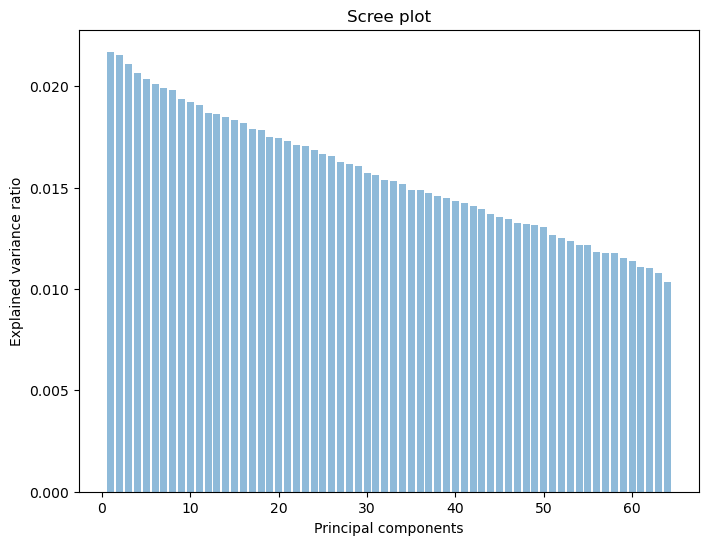

In [43]:
import matplotlib.pyplot as plt

# Assuming pca is your PCA model
explained_variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Scree plot')
plt.show()

In [44]:
pd.DataFrame(pca.components_[:2,:], columns=df.columns, index=['PC1','PC2'])

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
PC1,0.039933,-0.030373,-0.108258,0.025654,0.009594,-0.026229,-0.247985,-0.154825,-0.090866,0.206440,...,-0.146928,-0.339533,0.046903,-0.195660,0.102034,0.048325,0.088504,0.146358,-0.125633,-0.056910
PC2,0.014253,-0.046501,0.215799,-0.062775,0.242146,0.144405,0.065367,-0.013033,0.132609,0.053541,...,-0.015335,-0.063400,-0.242887,-0.047304,-0.135903,0.125914,0.063806,-0.100493,-0.113919,-0.254054


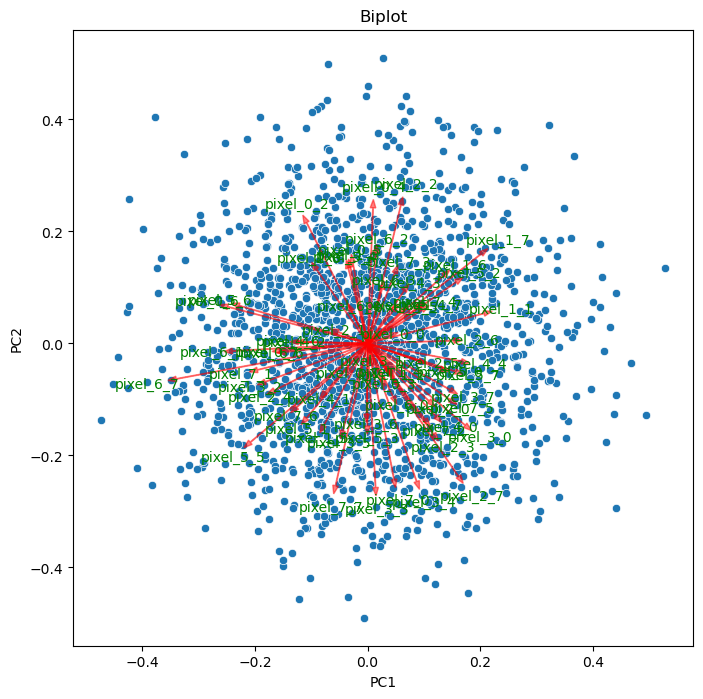

In [46]:
scale1 = 1.0 / (pc_scores_df['PC1'].max() - pc_scores_df['PC1'].min())
scale2 = 1.0 / (pc_scores_df['PC2'].max() - pc_scores_df['PC2'].min())

# Create a scatter plot
plt.figure(figsize=(8, 8))
sns.scatterplot(x=pc_scores_df['PC1'] * scale1, y=pc_scores_df['PC2'] * scale2).set_title('Biplot')

# Adding the coefficients
for i in range(df.shape[1]):  # Iterate over the number of features
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5, head_width=0.01)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, df.columns[i], color='g', ha='center', va='center')

plt.show()

### <font color='#eb3483'> Part 3: Develop a classifier to identify handwritten digits  </font>

Let's use logistic regression to identify the digit in an image based on the features that we engineered using principal components analysis.

First up, recall that logistic regression is can only handle a binary outcome variable. However, the outcome variable in our dataset (i.e. the digit) has 10 categories! To get around this, we will train a logistic model for each digit. In our first model, we will create a new target such that $y=1$ is the digit is a "0", and $y=0$ otherwise. In our second model, we set $y=1$ is the digit is a "1", and $y=0$ otherwise. And so on. This will give us 10 models. This is called a "one-vs-all" strategy for dealing with a multi-category outcome variable.

To classify a new image, we will get the probabilities from all 10 models and assign the digit with the highest probability. 


Begin by randomly splitting the dataset into training and test sets, so that you will be able to assess its performance on unseen data. Then fit the models as described above using the training data. Finally assess the classifiers performance on new, unseen data (i.e. the test set).

Step 1: Create a train/test split

In [47]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [48]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [49]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
pd.Series(digits["target"]).value_counts(normalize=True).sort_index()

0    0.099054
1    0.101280
2    0.098497
3    0.101836
4    0.100723
5    0.101280
6    0.100723
7    0.099610
8    0.096828
9    0.100167
Name: proportion, dtype: float64

In [51]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [52]:
X = pd.DataFrame(digits.data, columns=digits.feature_names)
y = digits.target

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('The training set has', X_train.shape[0], 'rows')
print('The test set has', X_test.shape[0], 'rows')

The training set has 1437 rows
The test set has 360 rows


In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 2: Fit a logistic regression model for each digit using the training data

In [57]:
from sklearn.linear_model import LogisticRegression
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [58]:
model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

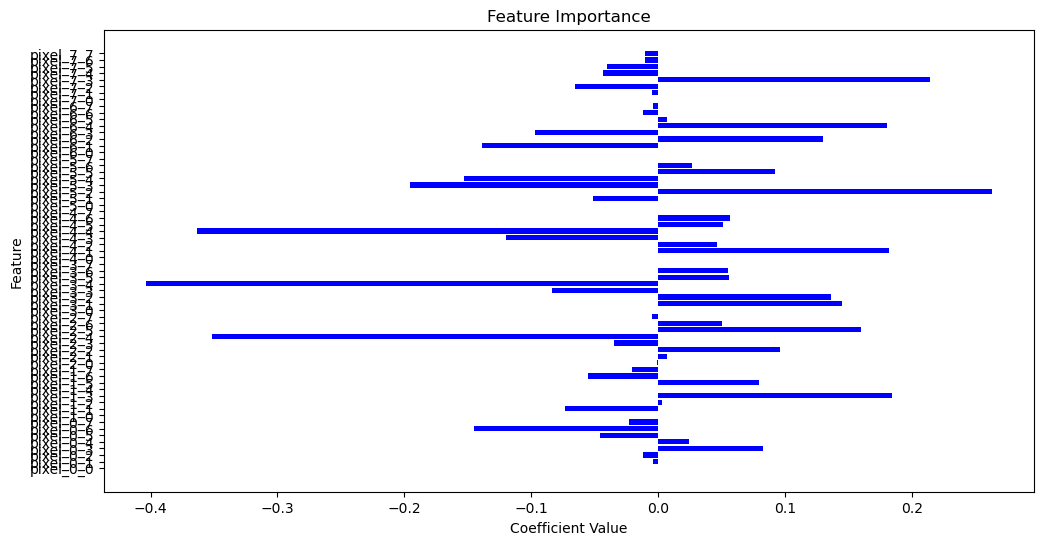

In [59]:
import matplotlib.pyplot as plt

# Get the coefficients
coefficients = model.coef_[0]

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.barh(range(len(digits.feature_names)), coefficients, color='b', align='center')
plt.yticks(range(len(digits.feature_names)), digits.feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Step 3: Assess the performance of your classification strategy on the test data 

In [60]:
y_pred = model.predict(X_test)
y_pred[:10]

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [62]:
y_prob = model.predict_proba(X_test)
y_prob[:10]

array([[1.76531990e-08, 6.81797900e-11, 4.22868935e-14, 8.11231954e-14,
        2.50495749e-10, 1.26655156e-10, 9.99992162e-01, 3.17168845e-11,
        7.82007141e-06, 2.27100686e-11],
       [1.19308902e-06, 8.02089422e-12, 3.44233207e-13, 4.48741671e-07,
        1.52145528e-08, 4.91519204e-03, 3.64607312e-16, 7.46307924e-08,
        5.63886531e-09, 9.95083071e-01],
       [2.39872998e-16, 1.66523102e-16, 3.86599678e-10, 9.99999200e-01,
        2.02251599e-22, 7.32502288e-11, 6.07768882e-17, 9.49575745e-14,
        4.18714696e-09, 7.95004134e-07],
       [1.78493342e-05, 2.04922283e-07, 6.66022554e-10, 2.50287768e-09,
        1.59953405e-08, 4.60679476e-05, 1.57596525e-10, 9.97332679e-01,
        2.81913655e-09, 2.60317651e-03],
       [5.54059449e-10, 1.81541749e-10, 9.78102430e-01, 2.17318518e-02,
        1.21704923e-21, 2.03817276e-09, 6.81248577e-09, 3.37854655e-11,
        1.65662141e-04, 4.68451832e-08],
       [7.33570137e-09, 9.94677486e-01, 4.54594037e-03, 1.34212936e-11,
   

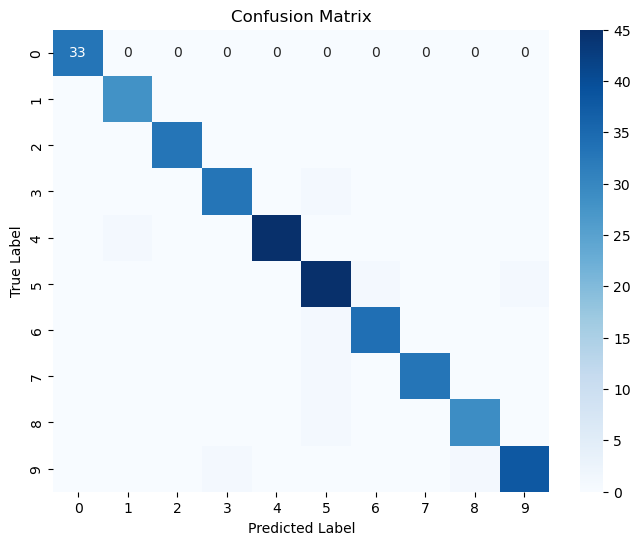

In [63]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot a confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975


In [65]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision:", precision)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [66]:
recall = metrics.recall_score(y_test, y_pred)
print("Recall:", recall)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported